**Scenario**

In this case study I analyzed the historical trip data of a fictional bike-share company in Chicago, called Cyclistic. The Cyclistic company has more than 5800 bicycles and 600 stations at its disposal.The director of marketing believes the company's future success depends on maximizing the number of annual memberships. She thinks that one of the possible marketing initiatives would be converting casual users (customers who purchase single-ride or full-day passes) into member users (customers who purchase annual memberships).


**1. ASK**

When approaching this challenge, I asked myself: "How do annual members and casual riders use Cyclistic bikes differently?".

**2. PREPARE**

I downloaded the dataset* that is used for this case study and stored it. 
I was required to download data for the last 12 months (the dataset stores 24 months)
I downloaded trip data between April 2021-March 2022. 

*You can access the datasets [here](https://divvy-tripdata.s3.amazonaws.com/index.html). It is a public dataset provided by Motivate International Inc.

**3. PROCESS**

I uploaded all the .csv files into R following below process: 


In [ ]:

##Installing the required packages

library("tidyverse")
library("ggplot2")
library("lubridate")

##Importing the data into different datasets

tripdata_2021_04 <- read_csv("divy-tripdata/202104-divvy-tripdata.csv")
tripdata_2021_05 <- read_csv("divy-tripdata/202105-divvy-tripdata.csv")
tripdata_2021_06 <- read_csv("divy-tripdata/202106-divvy-tripdata.csv")
tripdata_2021_07 <- read_csv("divy-tripdata/202107-divvy-tripdata.csv")
tripdata_2021_08 <- read_csv("divy-tripdata/202108-divvy-tripdata.csv")
tripdata_2021_09 <- read_csv("divy-tripdata/202109-divvy-tripdata.csv")
tripdata_2021_10 <- read_csv("divy-tripdata/202110-divvy-tripdata.csv")
tripdata_2021_11 <- read_csv("divy-tripdata/202111-divvy-tripdata.csv")
tripdata_2021_12 <- read_csv("divy-tripdata/202112-divvy-tripdata.csv")
tripdata_2022_01 <- read_csv("divy-tripdata/202201-divvy-tripdata.csv")
tripdata_2022_02 <- read_csv("divy-tripdata/202202-divvy-tripdata.csv")
tripdata_2022_03 <- read_csv("divy-tripdata/202203-divvy-tripdata.csv")

## Compare column names each of the files
## While the names don't have to be in the same order, they DO need to match perfectly before we can use a command to join them into one file

colnames(tripdata_2021_04)
colnames(tripdata_2021_05)
colnames(tripdata_2021_06)
colnames(tripdata_2021_07)
colnames(tripdata_2021_08)
colnames(tripdata_2021_09)
colnames(tripdata_2021_10)
colnames(tripdata_2021_11)
colnames(tripdata_2021_12)
colnames(tripdata_2022_01)
colnames(tripdata_2022_02)
colnames(tripdata_2022_03)

##Inspect the dataframe for incongruencies

str(tripdata_2021_04)
str(tripdata_2021_05)
str(tripdata_2021_06)
str(tripdata_2021_07)
str(tripdata_2021_08)
str(tripdata_2021_09)
str(tripdata_2021_10)
str(tripdata_2021_11)
str(tripdata_2021_12)
str(tripdata_2022_01)
str(tripdata_2022_02)


##Adjusting data types:
#start_station_id to be set as Integer

tripdata_2021_04$start_station_id <- as.integer(tripdata_2021_04$start_station_id)
tripdata_2021_05$start_station_id <- as.integer(tripdata_2021_05$start_station_id)
tripdata_2021_06$start_station_id <- as.integer(tripdata_2021_06$start_station_id)
tripdata_2021_07$start_station_id <- as.integer(tripdata_2021_07$start_station_id)
tripdata_2021_08$start_station_id <- as.integer(tripdata_2021_08$start_station_id)
tripdata_2021_09$start_station_id <- as.integer(tripdata_2021_09$start_station_id)
tripdata_2021_10$start_station_id <- as.integer(tripdata_2021_10$start_station_id)
tripdata_2021_11$start_station_id <- as.integer(tripdata_2021_11$start_station_id)
tripdata_2021_12$start_station_id <- as.integer(tripdata_2021_12$start_station_id)
tripdata_2022_01$start_station_id <- as.integer(tripdata_2022_01$start_station_id)
tripdata_2022_02$start_station_id <- as.integer(tripdata_2022_02$start_station_id)
tripdata_2022_03$start_station_id <- as.integer(tripdata_2022_03$start_station_id) 


#Merging all datasets into one

tripdata_ttm <- bind_rows(tripdata_2021_04, tripdata_2021_05, tripdata_2021_06, tripdata_2021_07, tripdata_2021_08, tripdata_2021_09
                          , tripdata_2021_10, tripdata_2021_11, tripdata_2021_12, tripdata_2022_01, tripdata_2022_02, tripdata_2022_03)


##Inspecting my new dataset: columns headers, number of columns, number of rows, duplicative values..

head(tripdata_ttm)
glimpse(tripdata_ttm)
str(tripdata_ttm)
tail(tripdata_ttm)
summary(tripdata_ttm)


#Fist we drop all NA:

tripdata_ttm_clean <- drop_na(tripdata_ttm)


# Add columns that list the date, month, day, and year of each ride
# This will allow to aggregate ride data for each month, day, or year 

tripdata_ttm_clean$date <- as.Date(tripdata_ttm_clean$started_at) 
tripdata_ttm_clean$month <- format(as.Date(tripdata_ttm_clean$date), "%m")
tripdata_ttm_clean$day <- format(as.Date(tripdata_ttm_clean$date), "%d")
tripdata_ttm_clean$year <- format(as.Date(tripdata_ttm_clean$date), "%Y")
tripdata_ttm_clean$day_of_week <- format(as.Date(tripdata_ttm_clean$date), "%A")

# Add "ride_length" calculation to trip_data (in seconds)

tripdata_ttm_clean$ride_length <- difftime(tripdata_ttm_clean$ended_at,tripdata_ttm_clean$started_at)



# Inspect the structure of the columns

str(tripdata_ttm_clean)

# Remove "bad" data
# The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative
# We will create a new version of the dataframe (v2) since data is being removed

tripdata_ttm_clean_v2 <- tripdata_ttm_clean[!(tripdata_ttm_clean$start_station_name == "HQ QR" | tripdata_ttm_clean$ride_length<0),]



**4. ANALYZE**

I conducted descriptive analysis by running a few calculations in one file to get a better sense of the data layout and the difference between Casual and Members users.


In [ ]:

# Descriptive analysis on ride_length (all figures in seconds)
mean(tripdata_ttm_clean_v2$ride_length) #straight average (total ride length / rides)
median(tripdata_ttm_clean_v2$ride_length) #midpoint number in the ascending array of ride lengths
max(tripdata_ttm_clean_v2$ride_length) #longest ride
min(tripdata_ttm_clean_v2$ride_length) #shortest ride

# You can condense the four lines above to one line using summary() on the specific attribute
summary(tripdata_ttm_clean_v2$ride_length)

# Compare members and casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)

# Compare members and casual users [another way]
tripdata_ttm_clean_v2 %>% 
  group_by(member_casual) %>% 
  summarise(avg_ride_lenth = mean(ride_length), median_ride_length = median(ride_length), max_ride_length = max(ride_length), min_ride_length = min(ride_length))

# See the average ride time by each day for members vs casual users
aggregate(tripdata_ttm_clean_v2$ride_length ~ tripdata_ttm_clean_v2$member_casual + tripdata_ttm_clean_v2$day_of_week, FUN = mean)

# Notice that the days of the week are out of order. Let's fix that.
tripdata_ttm_clean_v2$day_of_week <- ordered(tripdata_ttm_clean_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

# Now, let's run the average ride time by each day for members vs casual users
aggregate(tripdata_ttm_clean_v2$ride_length ~ tripdata_ttm_clean_v2$member_casual + tripdata_ttm_clean_v2$day_of_week, FUN = mean)


# analyze ridership data by user type, bike type and weekday
all_day_tripdata_ttm_clean_v2 <- tripdata_ttm_clean_v2 %>% 
  group_by(member_casual, day_of_week, rideable_type) %>%  
  summarise(number_of_rides = n(),average_duration = mean(ride_length)) %>%         
  arrange(member_casual, day_of_week, rideable_type)
   
# check the first 14 rows of the table created above
head(all_day_tripdata_ttm_clean_v2,14)




**5. VISUALIZE**

Now I would like to compare the weekly average duration for a Casual customer and a Member, to spot if there is any difference in the behaviour. 

In [ ]:
# create a visualization for average duration

all_day_tripdata_ttm_clean_v2 %>% 
  ggplot(aes(x = day_of_week, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") + labs(title='Average Weekly Trip Duration for each customer type')

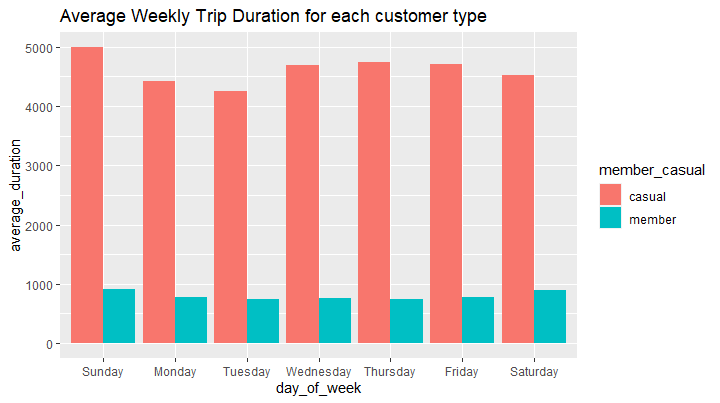

As the bar chart suggests, Members seems to use the bikes as a means of transportation, with seemingly equal trip durations; on the other hand, Casuals have longer trips on Sunday, which suggests a lucrative type of activity.

In [ ]:
# create a visualization for number of rides

all_day_tripdata_ttm_clean_v2 %>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") + labs(title='Average Weekly Number of Rides for each customer type')

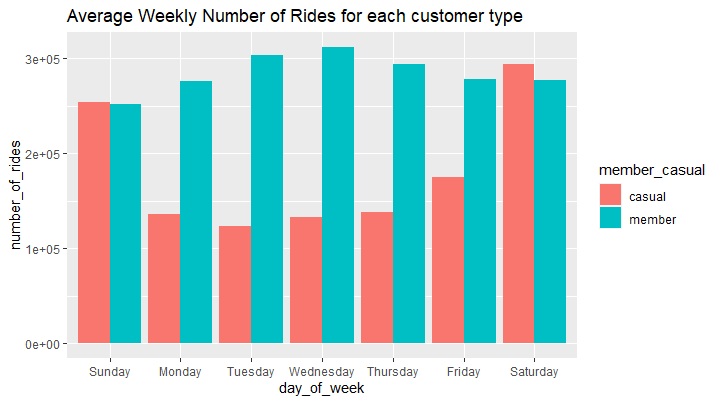

Additional interesting insights can come from visualizing similar bar charts on i) monthly cadence, ii) highlighting bike type (e.g. do Casual customers use different bikes than Members?) and so on...